In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import sklearn
sklearn.__version__

'0.24.2'

## Importing Dataset and EDA

In [3]:
df = pd.read_csv('Car_details_v3.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.shape

(8128, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 539.8+ KB


In [7]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
df.dropna(axis = 0, inplace = True)  #since we have enough data we can remove na values

In [9]:
print(df.shape, '\n', df.isnull().sum())

(7906, 13) 
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


In [10]:
df['Car_age'] = 2021 - df['year'] # A derived variable from the data given which may be important

In [11]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,7
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,7
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,15
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,11
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,14


In [12]:
df.describe()

,year,selling_price,km_driven,seats,Car_age
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,7.016064
std,3.863695,8.135827e+05,5.679230e+04,0.959208,3.863695
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,1.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,4.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,6.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,9.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,27.000000


## Data Cleaning

In [13]:
Features = df.drop(columns = ['name', 'year','torque']) #Dropping columns that are not required

In [14]:
Features.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,14


In [15]:
#Correcting the data types of some features

Features['mileage'] = Features['mileage'].replace(to_replace = 'kmpl|km/kg', value = '', regex = True).astype('float')

Features['engine'] = Features['engine'].replace('CC', '', regex = True).astype('int')

Features['max_power'] = Features['max_power'].replace('bhp', '',regex = True).astype('float')

Features.dtypes

selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int32
max_power        float64
seats            float64
Car_age            int64
dtype: object

In [16]:
Features['seller_type'] = Features['seller_type'].replace('Trustmark Dealer', 'Trustmark_Dealer')
Features['owner'] = (Features['owner'].replace('First Owner', 'First')
                                      .replace('Second Owner', 'Second')
                                      .replace('Third Owner', 'Third')
                                      .replace('Fourth & Above Owner', 'Fourth_above')
                                      .replace('Test Drive Car', 'Test_car'))

## Data Visualization

c:\users\yashbajpai13\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


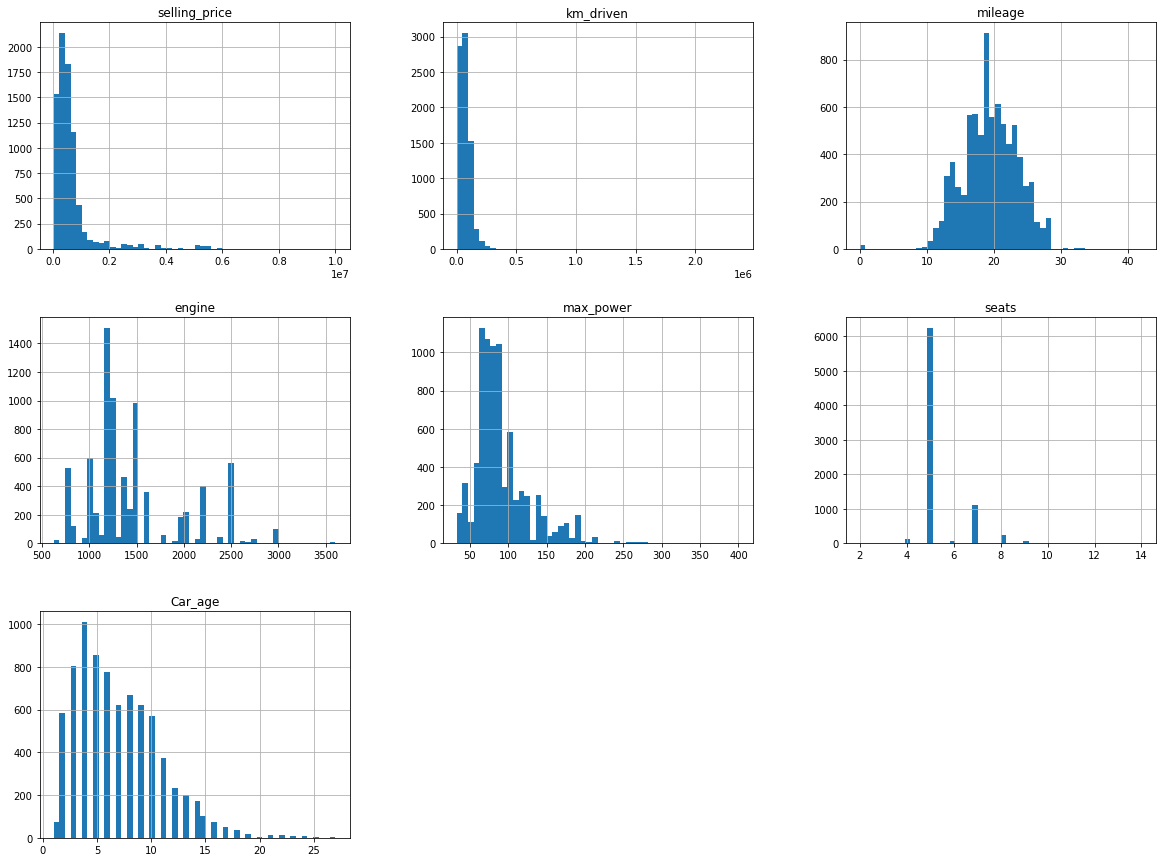

In [17]:
histograms = Features.hist(bins = 50, figsize = (20,15))

([<matplotlib.patches.Wedge at 0x1ca07310>,
 [Text(-0.5287948494819255, 0.9645600070298312, 'First'),
  Text(0.2542602127147971, -1.0702110746157631, 'Second'),
  Text(1.0392884276407395, -0.36038807440319065, 'Third'),
  Text(1.0974911079478653, -0.07425138365961592, 'Fourth_above'),
  Text(1.0999978287749954, -0.002185564068161089, 'Test_car')],
 [Text(-0.2884335542628684, 0.5261236401980897, '66.0%'),
  Text(0.13868738875352565, -0.5837514952449616, '25.5%'),
  Text(0.5668845968949487, -0.19657531331083125, '6.5%'),
  Text(0.5986315134261082, -0.04050075472342687, '2.0%'),
  Text(0.599998815695452, -0.0011921258553605938, '0.1%')])

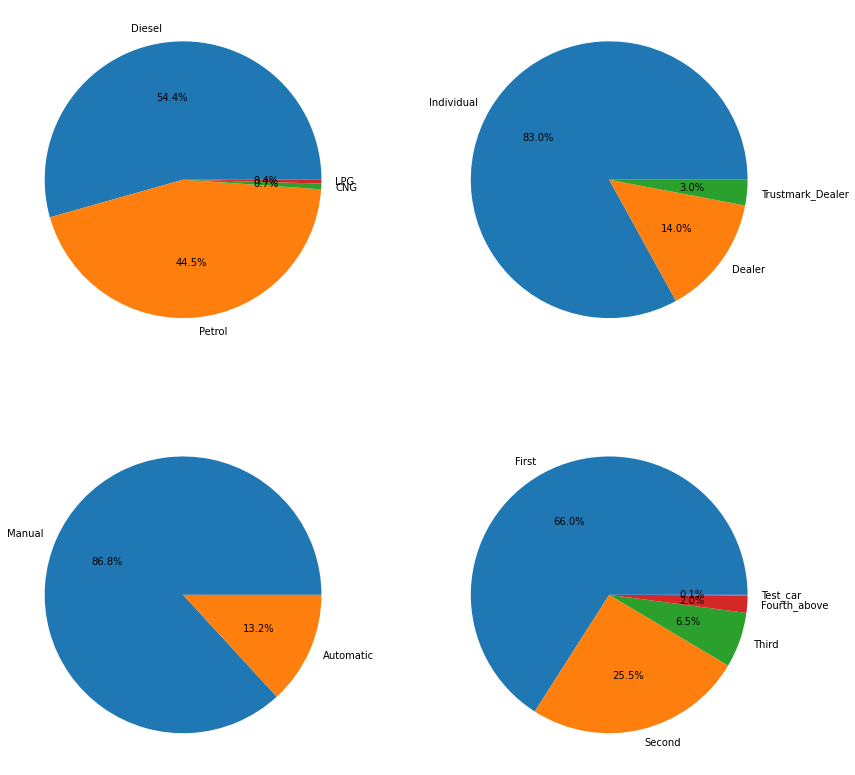

In [18]:
figure, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize = (14,14))

labels = Features['fuel'].value_counts().index.tolist()
values = Features['fuel'].value_counts().tolist()
ax1.pie(values, labels = labels, autopct = '%1.1f%%')

labels = Features['seller_type'].value_counts().index.tolist()
values = Features['seller_type'].value_counts().tolist()
ax2.pie(values, labels = labels, autopct = '%1.1f%%')

labels = Features['transmission'].value_counts().index.tolist()
values = Features['transmission'].value_counts().tolist()
ax3.pie(values, labels = labels, autopct = '%1.1f%%')

labels = Features['owner'].value_counts().index.tolist()
values = Features['owner'].value_counts().tolist()
ax4.pie(values, labels = labels, autopct = '%1.1f%%')

## Handling Categorical Variables

In [19]:
Features = pd.get_dummies(Features, drop_first = True)

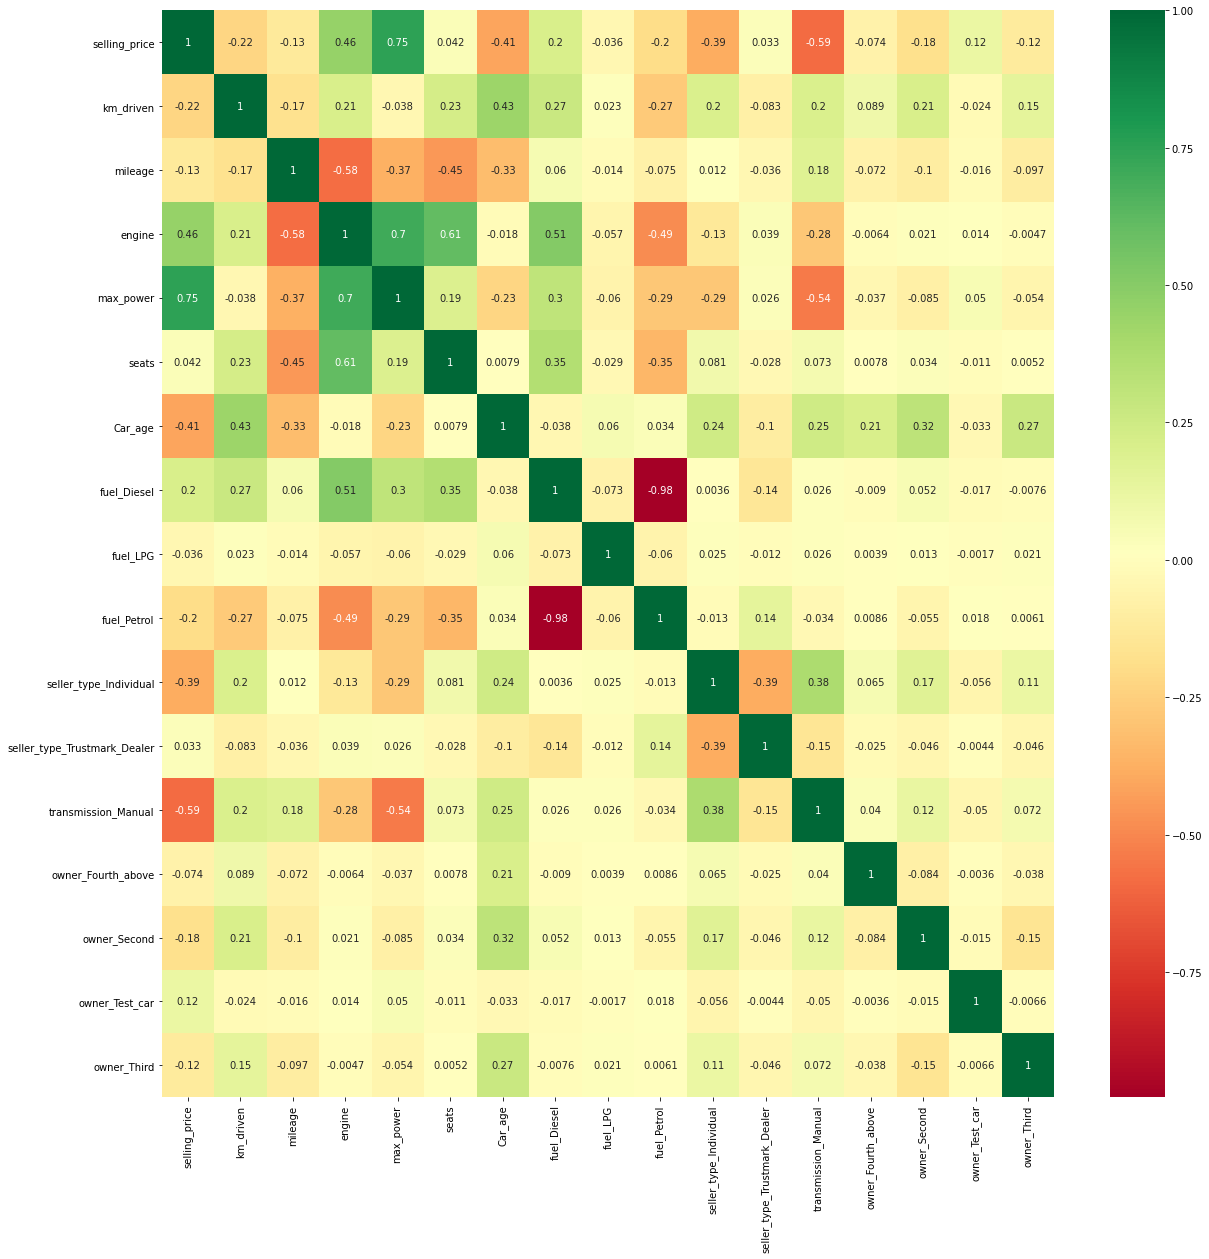

In [20]:
corr = Features.corr()
corr_features = corr.index
plt.figure(figsize = (20,20))

gg = sns.heatmap(Features[corr_features].corr().fillna(0.0), annot = True, cmap = 'RdYlGn')

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X = Features.drop('selling_price', axis = 1)
y = Features['selling_price']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)

In [22]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((5534, 16), (2372, 16), (5534,), (2372,))

# Random Forest Regressor Model And Hyperparameter Tuning using Randomized Search CV

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [24]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5,30,6)]

min_samples_split = [2,5,10,15,100]

min_samples_leaf = [1,2,5,10]

In [25]:
randomgrid = {'n_estimators' : n_estimators, 'max_features' : max_features, 'max_depth' : max_depth,
              'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf}

In [26]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = randomgrid, scoring = 'r2'
                              , n_iter = 10, cv = 5, verbose = 2, n_jobs = 1)

In [ ]:
rf_random.fit(xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=200; total time=   1.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=200; total time=   1.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=200; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=200; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=200; total time=   1.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_esti

In [ ]:
yhat = rf_random.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest, yhat)
r2

In [ ]:
N = ytest.shape[0] # number of samples
P = xtest.shape[1] # number of features
adj_r2 = 1 - ((1 - r2) * (N - 1) / (N - P - 1))
adj_r2

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(ytest - yhat)

In [ ]:
plt.scatter(ytest, yhat)

In [ ]:
import pickle

file = open('prediction.pkl', 'wb')

pickle.dump(rf_random, file)